Preamble

Name: Christopher Morris
Created: April 17, 2019

This program was made to model the magnetic field(s) (B field) of a wire(s) pointing in the positive z-direction 
(out of the screen). The program works by creating a meshgrid of equally distanced x and y points from -1 to 1. 
Two other arrays are made with the x and y components of the wire in each index. The arrays are subtracted from each other making 2 arrays with the x and y components of the radius vector from the wire to the points. The radius vector
is normalized and crossed with the dl vector (0,0,1) or (0,0,-1) depending on the current. The x and y components of the cross product are stored in two more arrays. These arrays are then multiplied by the magnitude of the electric field. The 2 meshgrid arrays and B-field arrays are inputted into the quiver function which plots the field.

This program is used to model the B-field of one single wire with a positive current, 2 parallel wires with positive currents, and 2 parallel wires with opposite currents.

The plots are scaled down and squared to properly see the arrows.


In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

n = 100#Number of points
points = np.linspace(-1,1,n).reshape(1,n) #Creating Single of points from -1 to 1
xv, yv = np.meshgrid(points, points, sparse = False) #Using Meshgrid to get 2 arrays with points.
    
def magnetic_field_wire(wire, direction): #Main Function
    ones = np.ones((n,n)) #Ones array 
    dl = np.array((0,0,1)) * direction #Returns positive dl when direction is (1) and negative for (-1) direction.
    
    wx = ones * wire[0] #Array for wire x-components
    wy = ones * wire[1] #Array for wire y-components
    
    rx = xv - wx #Array with difference between meshgrid x-values and wire x-components
    ry = yv - wy #Array with difference between meshgrid y-values and wire y-components
    
    B  = 2/np.sqrt(rx**2 + ry**2)
    Bx = np.zeros((n,n))
    By = np.zeros((n,n)) 
    #Returns distance
    
    for i in range(n):
        for j in range(n):
            # Gets x and y components of difference array, normalizes it, and crosses it with dl
            temp = np.array((rx[i,j], ry[i,j], 0))
            temp = temp / np.sqrt(rx[i,j]**2 + ry[i,j]**2)
            tempcross = np.cross(dl, temp)
            
            Bx[i,j] = tempcross[0] #Adds to magnetic field array of x-components the x-component of the cross product
            By[i,j] = tempcross[1] #Same for y
            
    Bx *= B #multiplies x-components by the magnitude of the field 
    By *= B 
    return [Bx, By]
    

Magnetic Field for one wire


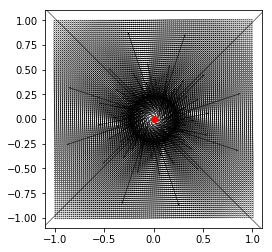

In [14]:
#Plotting the magnetic field for a single wire in the positive current.
wire = np.array([0,0,0]) #wire vector located at zero
Bx, By = magnetic_field_wire(wire, 1) #Gets x and y components of B-field.
plt.quiver(xv,yv,Bx,By, scale = 150) #Plots field
plt.plot(wire[0],wire[1],'ro') #Plots wire
plt.axis('square')
print('Magnetic Field for one wire')


Magnetic field for 2 parallel wires,
The lines create one large, elliptical field around the wires, and they cancel out in the middle.


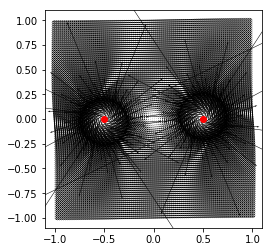

In [15]:
#Plots magnetic field for 2 wires both with positive current.
wire1 = np.array([-.5,0,0]) #wire1 vector
wire2 = np.array([.5,0,0])  #wire2 vector
Bx1, By1 = magnetic_field_wire(wire1,1)  #Components of B-field for first wire
Bx2, By2 = magnetic_field_wire(wire2,1)  #Components of B-field for second wire
plt.quiver(xv,yv,Bx1 + Bx2, By1 + By2, scale = 150) #Plotting field and wires.
plt.plot(wire1[0], wire1[1], 'ro')
plt.plot(wire2[0], wire2[1], 'ro')
plt.axis('square')
print('Magnetic field for 2 parallel wires,')
print('The lines create one large, elliptical field around the wires, and they cancel out in the middle.')


Magnetic field for 2 anti-parallel wires
The lines converge in the middle creating a stronger field in the middle, and a weaker field outside the middle.


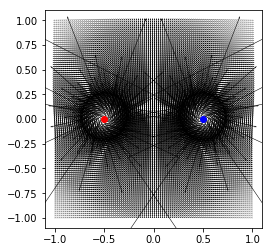

In [16]:
#Plotting B-field for two wire with opposite currents.
wire1 = np.array([-.5,0,0]) #wire1 vector
wire2 = np.array([.5,0,0])  #wire2 vector 
Bx1, By1 = magnetic_field_wire(wire1,1)  #components of B-field with positive current
Bx2, By2 = magnetic_field_wire(wire2,-1) #components of B-field with negative current
plt.quiver(xv,yv,Bx1 + Bx2, By1 + By2, scale = 150) #plotting B-field and wires
plt.plot(wire1[0], wire1[1], 'ro')
plt.plot(wire2[0], wire2[1], 'bo')
plt.axis('square')
print('Magnetic field for 2 anti-parallel wires')
print('The lines converge in the middle creating a stronger field in the middle, and a weaker field outside the middle.')
